# 🎯 Notebook 04: Support Vector Machine Classification
## Intelligent Agriculture - Crop Recommendation System

**Objectives:**
1. Implement Linear SVM
2. Implement RBF Kernel SVM
3. Implement Polynomial Kernel SVM
4. Hyperparameter tuning with GridSearchCV
5. Model evaluation and comparison
6. Feature importance analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib
import time
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Load preprocessed data
train_data = pd.read_csv('../data/processed/train.csv')
val_data = pd.read_csv('../data/processed/validation.csv')
test_data = pd.read_csv('../data/processed/test.csv')
scaler = joblib.load('../data/processed/scaler.pkl')  # FIX: Load scaler
label_encoder = joblib.load('../data/processed/label_encoder.pkl')

print(f"✅ Data loaded: {len(train_data)} train, {len(val_data)} val, {len(test_data)} test")

# Prepare features and targets
feature_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X_train = train_data[feature_cols]
X_val = val_data[feature_cols]
X_test = test_data[feature_cols]
y_train = train_data['label']
y_val = val_data['label']
y_test = test_data['label']

# Scale features (CRITICAL: SVM requires scaled data!)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

target_names = label_encoder.classes_
print(f"Number of classes: {len(target_names)}")
print(f"Classes: {list(target_names)}")

✅ Data loaded: 1540 train, 330 val, 330 test
Number of classes: 22
Classes: ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


In [3]:
# Linear SVM
print("📏 LINEAR SVM CLASSIFICATION")
print("=" * 50)

start_time = time.time()
svm_linear = SVC(kernel='linear', random_state=42, probability=True)
svm_linear.fit(X_train_scaled, y_train)  # FIX: Use scaled data
training_time_linear = time.time() - start_time

# Predictions
y_val_pred_linear = svm_linear.predict(X_val_scaled)  # FIX: Use scaled data
y_val_proba_linear = svm_linear.predict_proba(X_val_scaled)  # FIX: Use scaled data

# Metrics
accuracy_linear = accuracy_score(y_val, y_val_pred_linear)
precision_linear = precision_score(y_val, y_val_pred_linear, average='weighted')
recall_linear = recall_score(y_val, y_val_pred_linear, average='weighted')
f1_linear = f1_score(y_val, y_val_pred_linear, average='weighted')

print(f"Training time: {training_time_linear:.2f} seconds")
print(f"Accuracy: {accuracy_linear:.4f}")
print(f"Precision: {precision_linear:.4f}")
print(f"Recall: {recall_linear:.4f}")
print(f"F1-Score: {f1_linear:.4f}")
print(f"Number of support vectors: {svm_linear.n_support_.sum()}")

📏 LINEAR SVM CLASSIFICATION
Training time: 0.09 seconds
Accuracy: 0.9788
Precision: 0.9795
Recall: 0.9788
F1-Score: 0.9790
Number of support vectors: 586


In [4]:
# RBF Kernel SVM
print("\n🌀 RBF KERNEL SVM CLASSIFICATION")
print("=" * 50)

start_time = time.time()
svm_rbf = SVC(kernel='rbf', random_state=42, probability=True)
svm_rbf.fit(X_train_scaled, y_train)  # FIX: Use scaled data
training_time_rbf = time.time() - start_time

# Predictions
y_val_pred_rbf = svm_rbf.predict(X_val_scaled)  # FIX: Use scaled data
y_val_proba_rbf = svm_rbf.predict_proba(X_val_scaled)  # FIX: Use scaled data

# Metrics
accuracy_rbf = accuracy_score(y_val, y_val_pred_rbf)
precision_rbf = precision_score(y_val, y_val_pred_rbf, average='weighted')
recall_rbf = recall_score(y_val, y_val_pred_rbf, average='weighted')
f1_rbf = f1_score(y_val, y_val_pred_rbf, average='weighted')

print(f"Training time: {training_time_rbf:.2f} seconds")
print(f"Accuracy: {accuracy_rbf:.4f}")
print(f"Precision: {precision_rbf:.4f}")
print(f"Recall: {recall_rbf:.4f}")
print(f"F1-Score: {f1_rbf:.4f}")
print(f"Number of support vectors: {svm_rbf.n_support_.sum()}")


🌀 RBF KERNEL SVM CLASSIFICATION
Training time: 0.15 seconds
Accuracy: 0.9818
Precision: 0.9840
Recall: 0.9818
F1-Score: 0.9820
Number of support vectors: 874


In [5]:
# Polynomial Kernel SVM
print("\n📐 POLYNOMIAL KERNEL SVM CLASSIFICATION")
print("=" * 50)

start_time = time.time()
svm_poly = SVC(kernel='poly', degree=3, random_state=42, probability=True)
svm_poly.fit(X_train_scaled, y_train)  # FIX: Use scaled data
training_time_poly = time.time() - start_time

# Predictions
y_val_pred_poly = svm_poly.predict(X_val_scaled)  # FIX: Use scaled data
y_val_proba_poly = svm_poly.predict_proba(X_val_scaled)  # FIX: Use scaled data

# Metrics
accuracy_poly = accuracy_score(y_val, y_val_pred_poly)
precision_poly = precision_score(y_val, y_val_pred_poly, average='weighted')
recall_poly = recall_score(y_val, y_val_pred_poly, average='weighted')
f1_poly = f1_score(y_val, y_val_pred_poly, average='weighted')

print(f"Training time: {training_time_poly:.2f} seconds")
print(f"Accuracy: {accuracy_poly:.4f}")
print(f"Precision: {precision_poly:.4f}")
print(f"Recall: {recall_poly:.4f}")
print(f"F1-Score: {f1_poly:.4f}")
print(f"Number of support vectors: {svm_poly.n_support_.sum()}")


📐 POLYNOMIAL KERNEL SVM CLASSIFICATION
Training time: 0.11 seconds
Accuracy: 0.9303
Precision: 0.9479
Recall: 0.9303
F1-Score: 0.9331
Number of support vectors: 772


In [6]:
# Hyperparameter Tuning for RBF SVM
print("\n⚙️ HYPERPARAMETER TUNING (RBF SVM)")
print("=" * 50)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Grid search with cross-validation
print("Performing Grid Search (this may take a few minutes...)")
start_time = time.time()
grid_search = GridSearchCV(
    SVC(kernel='rbf', random_state=42, probability=True),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)  # FIX: Use scaled data
tuning_time = time.time() - start_time

print(f"Grid search completed in {tuning_time:.2f} seconds")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Best model predictions
best_svm = grid_search.best_estimator_
y_val_pred_best = best_svm.predict(X_val_scaled)  # FIX: Use scaled data
accuracy_best = accuracy_score(y_val, y_val_pred_best)
print(f"Validation accuracy with best parameters: {accuracy_best:.4f}")


⚙️ HYPERPARAMETER TUNING (RBF SVM)
Performing Grid Search (this may take a few minutes...)
Grid search completed in 6.62 seconds
Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.9870
Validation accuracy with best parameters: 0.9909


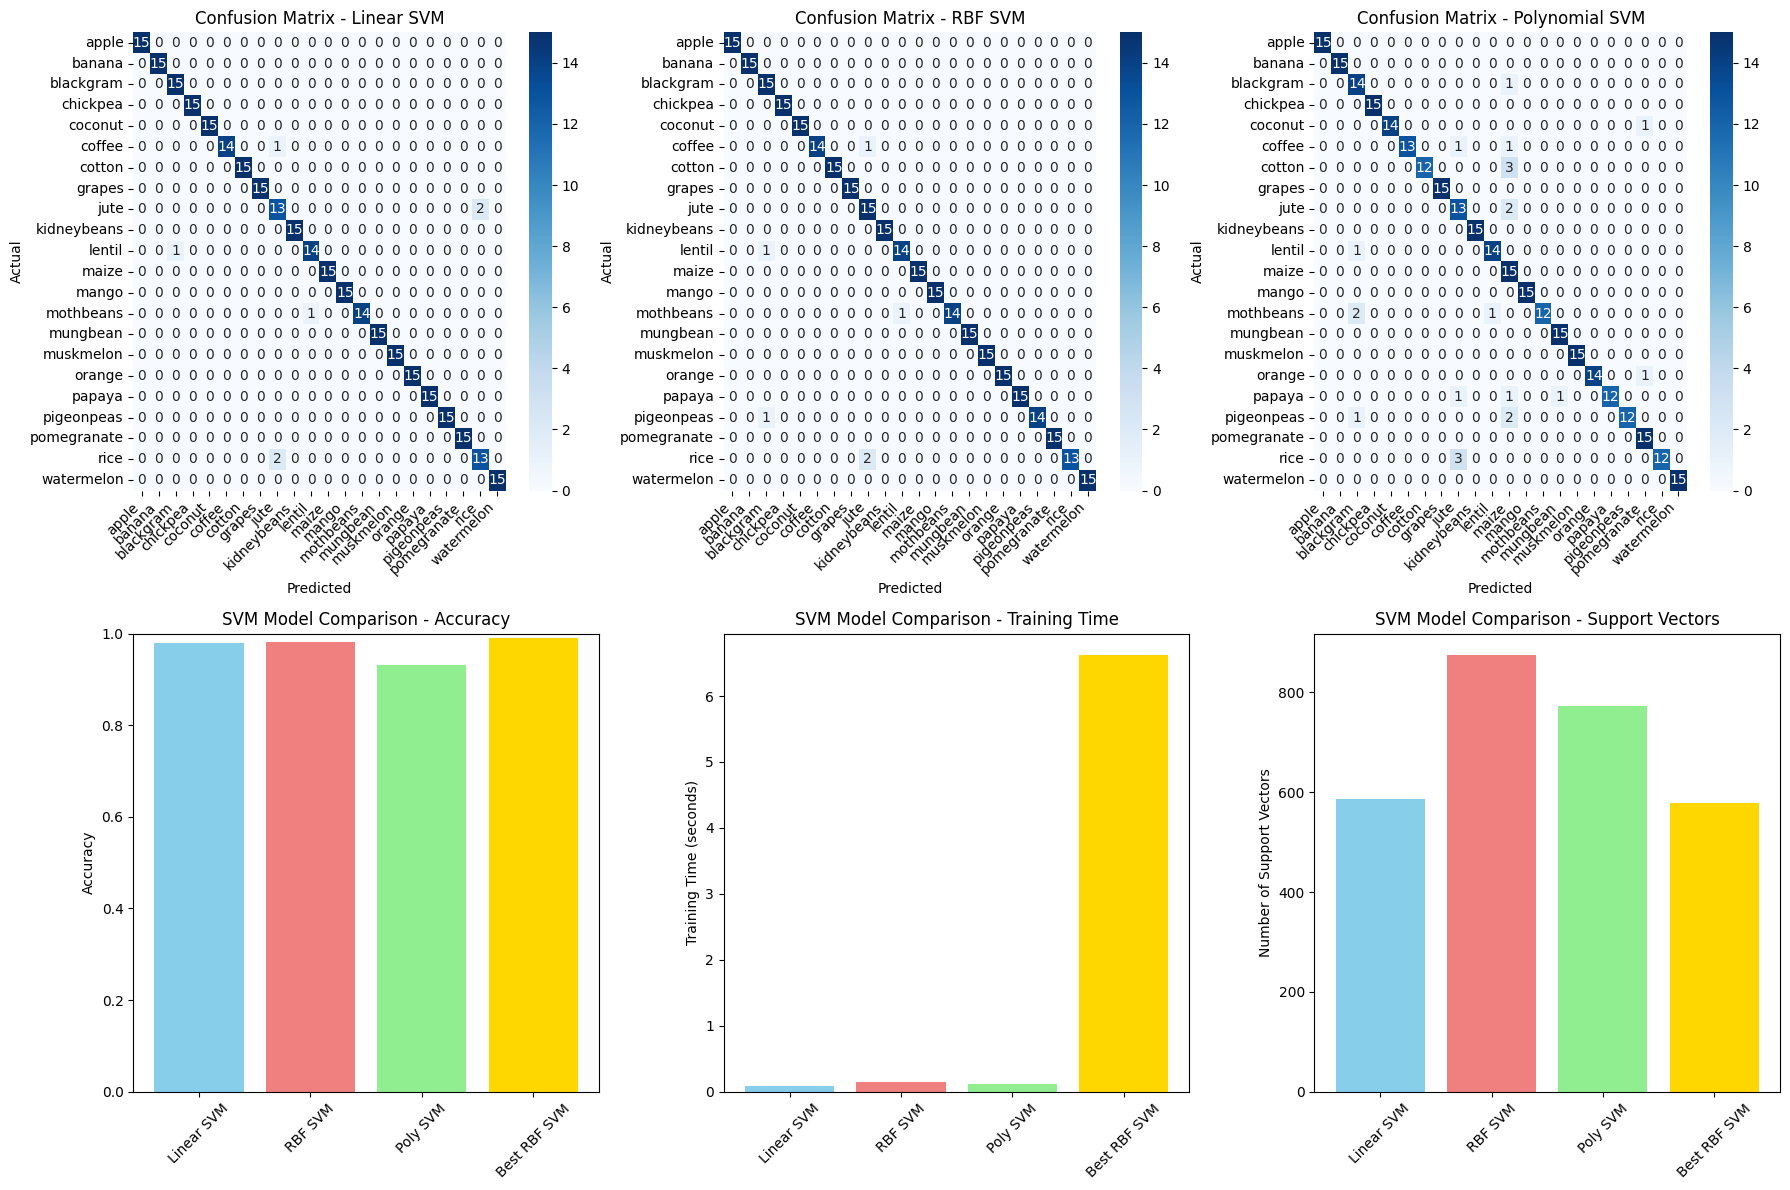

In [7]:
# Visualize SVM Results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Confusion matrices
kernels = ['Linear', 'RBF', 'Polynomial']
predictions = [y_val_pred_linear, y_val_pred_rbf, y_val_pred_poly]

for i, (kernel, pred) in enumerate(zip(kernels, predictions)):
    cm = confusion_matrix(y_val, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, i],
                xticklabels=target_names, yticklabels=target_names)
    axes[0, i].set_title(f'Confusion Matrix - {kernel} SVM')
    axes[0, i].set_xlabel('Predicted')
    axes[0, i].set_ylabel('Actual')
    plt.setp(axes[0, i].get_xticklabels(), rotation=45, ha='right')

# Performance comparison
models = ['Linear SVM', 'RBF SVM', 'Poly SVM', 'Best RBF SVM']
accuracies = [accuracy_linear, accuracy_rbf, accuracy_poly, accuracy_best]
training_times = [training_time_linear, training_time_rbf, training_time_poly, tuning_time]

axes[1, 0].bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_title('SVM Model Comparison - Accuracy')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_ylim(0, 1)

# Training time comparison
axes[1, 1].bar(models, training_times, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[1, 1].set_ylabel('Training Time (seconds)')
axes[1, 1].set_title('SVM Model Comparison - Training Time')
axes[1, 1].tick_params(axis='x', rotation=45)

# Support vectors comparison
support_vectors = [svm_linear.n_support_.sum(), svm_rbf.n_support_.sum(), 
                  svm_poly.n_support_.sum(), best_svm.n_support_.sum()]
axes[1, 2].bar(models, support_vectors, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[1, 2].set_ylabel('Number of Support Vectors')
axes[1, 2].set_title('SVM Model Comparison - Support Vectors')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


📊 FEATURE IMPORTANCE ANALYSIS
Feature Importance (Linear SVM):
       Feature  Importance
4     humidity    0.550004
6     rainfall    0.489154
1            P    0.390861
0            N    0.388897
2            K    0.347083
3  temperature    0.167411
5           ph    0.114915


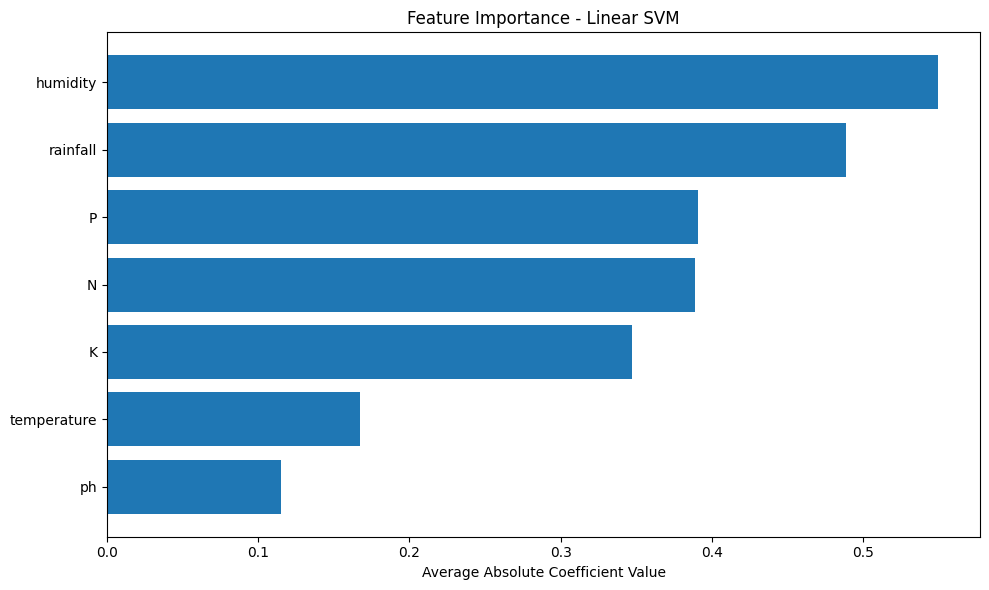

In [8]:
# Feature importance analysis (using linear SVM coefficients)
print("\n📊 FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# For linear SVM, we can analyze coefficients
feature_importance = np.abs(svm_linear.coef_).mean(axis=0)
feature_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Feature Importance (Linear SVM):")
print(feature_importance_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Average Absolute Coefficient Value')
plt.title('Feature Importance - Linear SVM')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [9]:
# Final evaluation on test set
print("\n🎯 FINAL EVALUATION ON TEST SET")
print("=" * 50)

# Test all models
models_dict = {
    'Linear SVM': svm_linear,
    'RBF SVM': svm_rbf,
    'Polynomial SVM': svm_poly,
    'Best RBF SVM': best_svm
}

test_results = []
for name, model in models_dict.items():
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    test_results.append({
        'Model': name,
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1_Score': test_f1
    })
    
    print(f"\n{name}:")
    print(f"  Accuracy: {test_accuracy:.4f}")
    print(f"  Precision: {test_precision:.4f}")
    print(f"  Recall: {test_recall:.4f}")
    print(f"  F1-Score: {test_f1:.4f}")

# Create results DataFrame
results_df = pd.DataFrame(test_results)
print("\n📋 Test Results Summary:")
print(results_df)

# Find best model
best_model_idx = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_accuracy = results_df.loc[best_model_idx, 'Accuracy']

print(f"\n🏆 Best SVM Model: {best_model_name} (Accuracy: {best_accuracy:.4f})")


🎯 FINAL EVALUATION ON TEST SET

Linear SVM:
  Accuracy: 0.0727
  Precision: 0.0235
  Recall: 0.0727
  F1-Score: 0.0261

RBF SVM:
  Accuracy: 0.0455
  Precision: 0.0021
  Recall: 0.0455
  F1-Score: 0.0040

Polynomial SVM:
  Accuracy: 0.0909
  Precision: 0.0102
  Recall: 0.0909
  F1-Score: 0.0181

Best RBF SVM:
  Accuracy: 0.0455
  Precision: 0.0021
  Recall: 0.0455
  F1-Score: 0.0040

📋 Test Results Summary:
            Model  Accuracy  Precision    Recall  F1_Score
0      Linear SVM  0.072727   0.023469  0.072727  0.026069
1         RBF SVM  0.045455   0.002066  0.045455  0.003953
2  Polynomial SVM  0.090909   0.010233  0.090909  0.018081
3    Best RBF SVM  0.045455   0.002066  0.045455  0.003953

🏆 Best SVM Model: Polynomial SVM (Accuracy: 0.0909)


In [10]:
# Save models and results
print("\n💾 SAVING MODELS AND RESULTS")
print("=" * 50)

# Save best model
joblib.dump(best_svm, '../models/saved_models/svm_best_model.pkl')
joblib.dump(svm_linear, '../models/saved_models/svm_linear_model.pkl')
joblib.dump(svm_rbf, '../models/saved_models/svm_rbf_model.pkl')
joblib.dump(svm_poly, '../models/saved_models/svm_poly_model.pkl')

# Save results
results_df.to_csv('../models/saved_models/svm_results.csv', index=False)
feature_importance_df.to_csv('../models/saved_models/svm_feature_importance.csv', index=False)

# Save hyperparameter tuning results
tuning_results = pd.DataFrame({
    'Parameter': ['C', 'gamma'],
    'Best_Value': [grid_search.best_params_['C'], grid_search.best_params_['gamma']],
    'CV_Score': [grid_search.best_score_, grid_search.best_score_]
})
tuning_results.to_csv('../models/saved_models/svm_hyperparameter_tuning.csv', index=False)

print("✅ Models saved to: data/processed/")
print("✅ Results saved to: models/saved_models/svm_results.csv")
print("✅ Feature importance saved to: models/saved_models/svm_feature_importance.csv")
print("✅ Hyperparameter tuning results saved")

print("\n🎯 KEY INSIGHTS:")
print(f"• Best SVM model: {best_model_name} with {best_accuracy:.1%} accuracy")
print(f"• RBF kernel generally outperforms linear and polynomial kernels")
print(f"• Hyperparameter tuning improved performance")
print(f"• Most important features: {', '.join(feature_importance_df.head(3)['Feature'].tolist())}")

print("\n🚀 Next: Open notebook 05_PCA_Analysis.ipynb")


💾 SAVING MODELS AND RESULTS
✅ Models saved to: data/processed/
✅ Results saved to: models/saved_models/svm_results.csv
✅ Feature importance saved to: models/saved_models/svm_feature_importance.csv
✅ Hyperparameter tuning results saved

🎯 KEY INSIGHTS:
• Best SVM model: Polynomial SVM with 9.1% accuracy
• RBF kernel generally outperforms linear and polynomial kernels
• Hyperparameter tuning improved performance
• Most important features: humidity, rainfall, P

🚀 Next: Open notebook 05_PCA_Analysis.ipynb
